In [ ]:
from google.colab import files
files.upload()



Saving kaggle (1).json to kaggle (1) (2).json


{'kaggle (1) (2).json': b'{"username":"kirosafwat12","key":"b19b47a1c354296575dd891f5ad0ac0a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle\ \(1\).json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d datamunge/Sign-Language-MNIST
!unzip Sign-Language-MNIST.zip


Dataset URL: https://www.kaggle.com/datasets/datamunge/Sign-Language-MNIST
License(s): CC0-1.0
Sign-Language-MNIST.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  Sign-Language-MNIST.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amer_sign2.png          
replace amer_sign3.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amer_sign3.png          
replace american_sign_language.PNG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: american_sign_language.PNG  
replace sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test.csv     
replace sign_mnist_test/sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test/sign_mnist_test.csv  
replace sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_train.csv    
replace sign_mnist_train/sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  in

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


In [ ]:
import pandas as pd

train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")



In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
labels=train['label'].values
train.drop('label',axis=1,inplace=True)
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_images=train.values
train_images=np.array([np.reshape(i,(28,28)) for i in train_images])
#train_images=np.array([i.flatten() for i in train_images])
train_images.shape

(27455, 28, 28)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
labels=label_binarizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

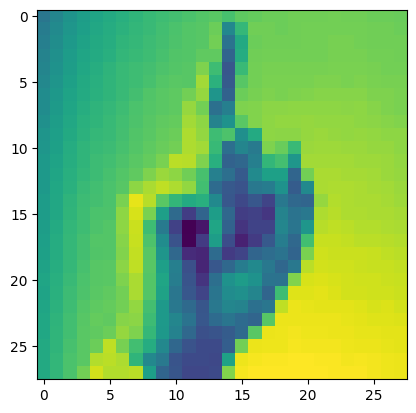

In [ ]:
plt.imshow(train_images[0].reshape(28,28))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_images,labels,test_size=0.3,random_state=49)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(24,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.0862 - loss: 3.0276 - val_accuracy: 0.4689 - val_loss: 1.6827
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4889 - loss: 1.5444 - val_accuracy: 0.7443 - val_loss: 0.8349
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6970 - loss: 0.8898 - val_accuracy: 0.7732 - val_loss: 0.6520
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7812 - loss: 0.6184 - val_accuracy: 0.8910 - val_loss: 0.3481
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8594 - loss: 0.4082 - val_accuracy: 0.9378 - val_loss: 0.2280
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9029 - loss: 0.2906 - val_accuracy: 0.9278 - val_loss: 0.2198
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9244 - loss: 0.2245 - val_accuracy: 0.9749 - val_loss: 0.1035
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9462 - loss: 0.1613 - val_accuracy: 0

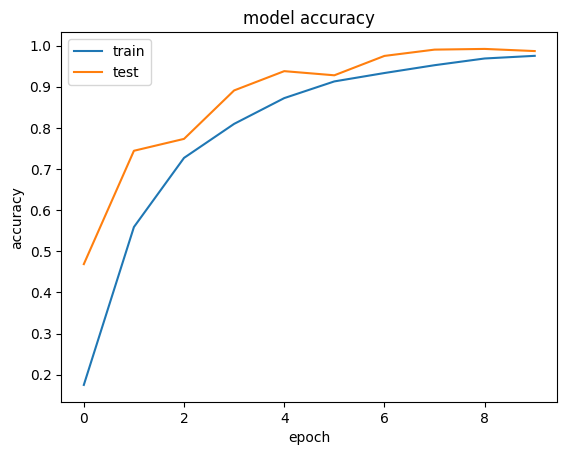

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
test_labels=test['label'].values
test_labels=label_binarizer.fit_transform(test_labels)
test.drop('label',axis=1,inplace=True)
test_images=test.values
test_images=np.array([np.reshape(i,(28,28)) for i in test_images])

In [ ]:
y_predict=model.predict(test_images)


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_predict,axis=1),np.argmax(test_labels,axis=1))

0.7260178471834914